In [316]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Linear Regression on Time Series Data

1. [2 points] Time Series Exploration : Try to understand the time series dataset uploaded along with the exercise. This involves (but is not limited to) plotting the multivariate time series (time on x-axis) clearly labelled and formatted, understanding how the multivariate time series interacts, understanding the correlation between the different variables, plots for variable density functions, identifying inherent seasonality or trend etc.

In [317]:
df = pd.read_csv('time_series.csv',index_col='date',parse_dates=True)
df.head()
print(df)

                         X1     X2     X3     X4     X5     X6          Y
date                                                                     
2016-07-01 00:00:00   5.827  2.009  1.599  0.462  4.203  1.340  30.531000
2016-07-01 01:00:00   5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2016-07-01 02:00:00   5.157  1.741  1.279  0.355  3.777  1.218  27.787001
2016-07-01 03:00:00   5.090  1.942  1.279  0.391  3.807  1.279  25.044001
2016-07-01 04:00:00   5.358  1.942  1.492  0.462  3.868  1.279  21.948000
...                     ...    ...    ...    ...    ...    ...        ...
2018-06-26 15:00:00  -1.674  3.550 -5.615  2.132  3.472  1.523  10.904000
2018-06-26 16:00:00  -5.492  4.287 -9.132  2.274  3.533  1.675  11.044000
2018-06-26 17:00:00   2.813  3.818 -0.817  2.097  3.716  1.523  10.271000
2018-06-26 18:00:00   9.243  3.818  5.472  2.097  3.655  1.432   9.778000
2018-06-26 19:00:00  10.114  3.550  6.183  1.564  3.716  1.462   9.567000

[17420 rows x 7 columns]


In [318]:
plt.style.use('default')

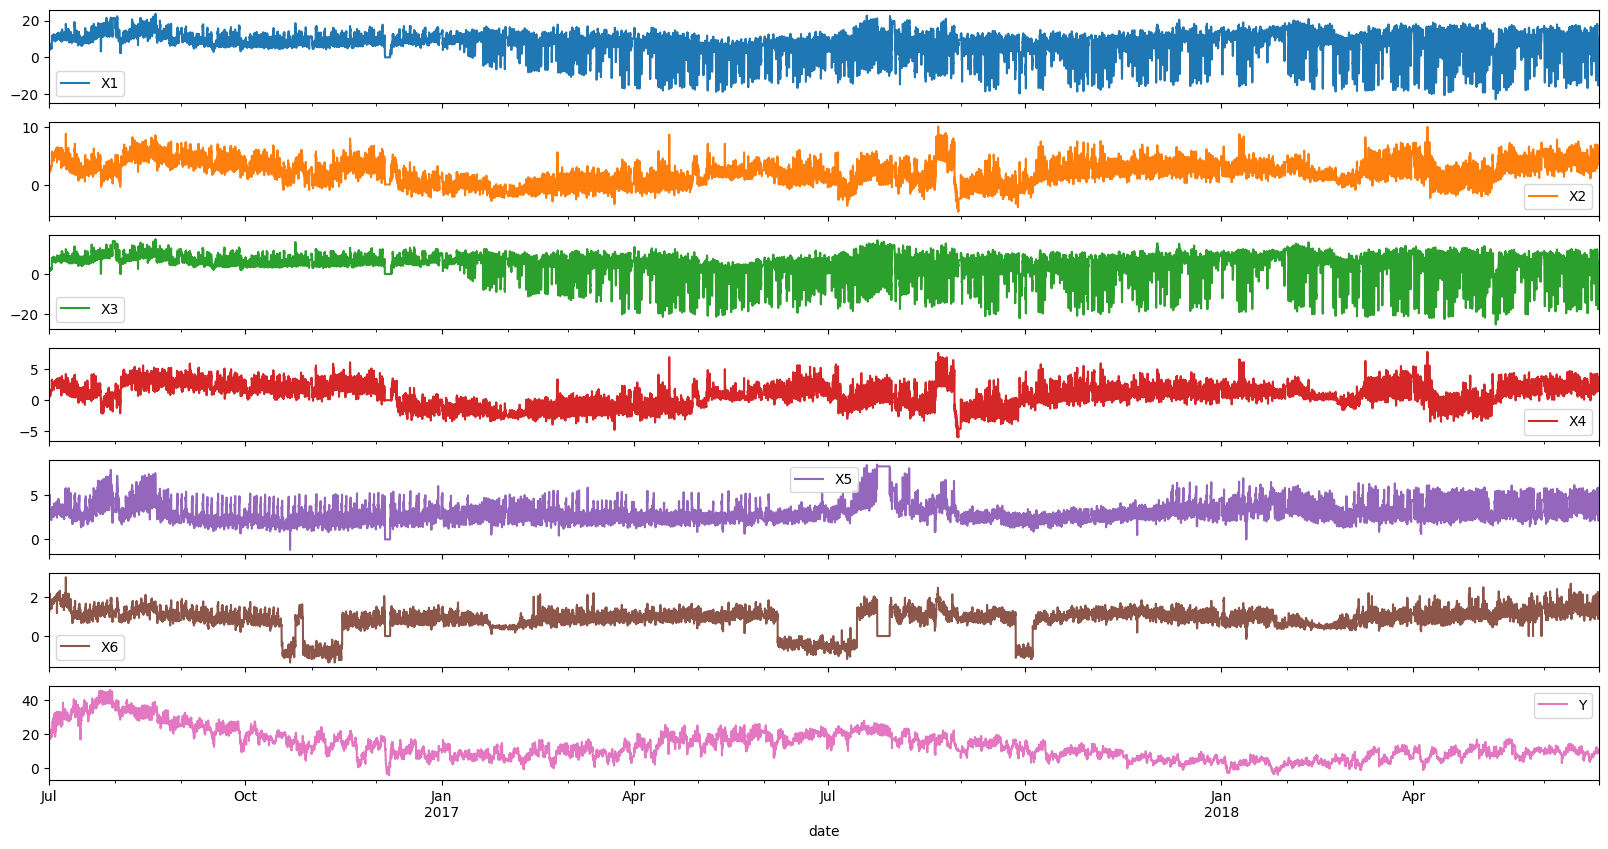

In [319]:
df.plot(subplots=True,figsize=(20,10))
plt.show()

#### Histogram for all variables

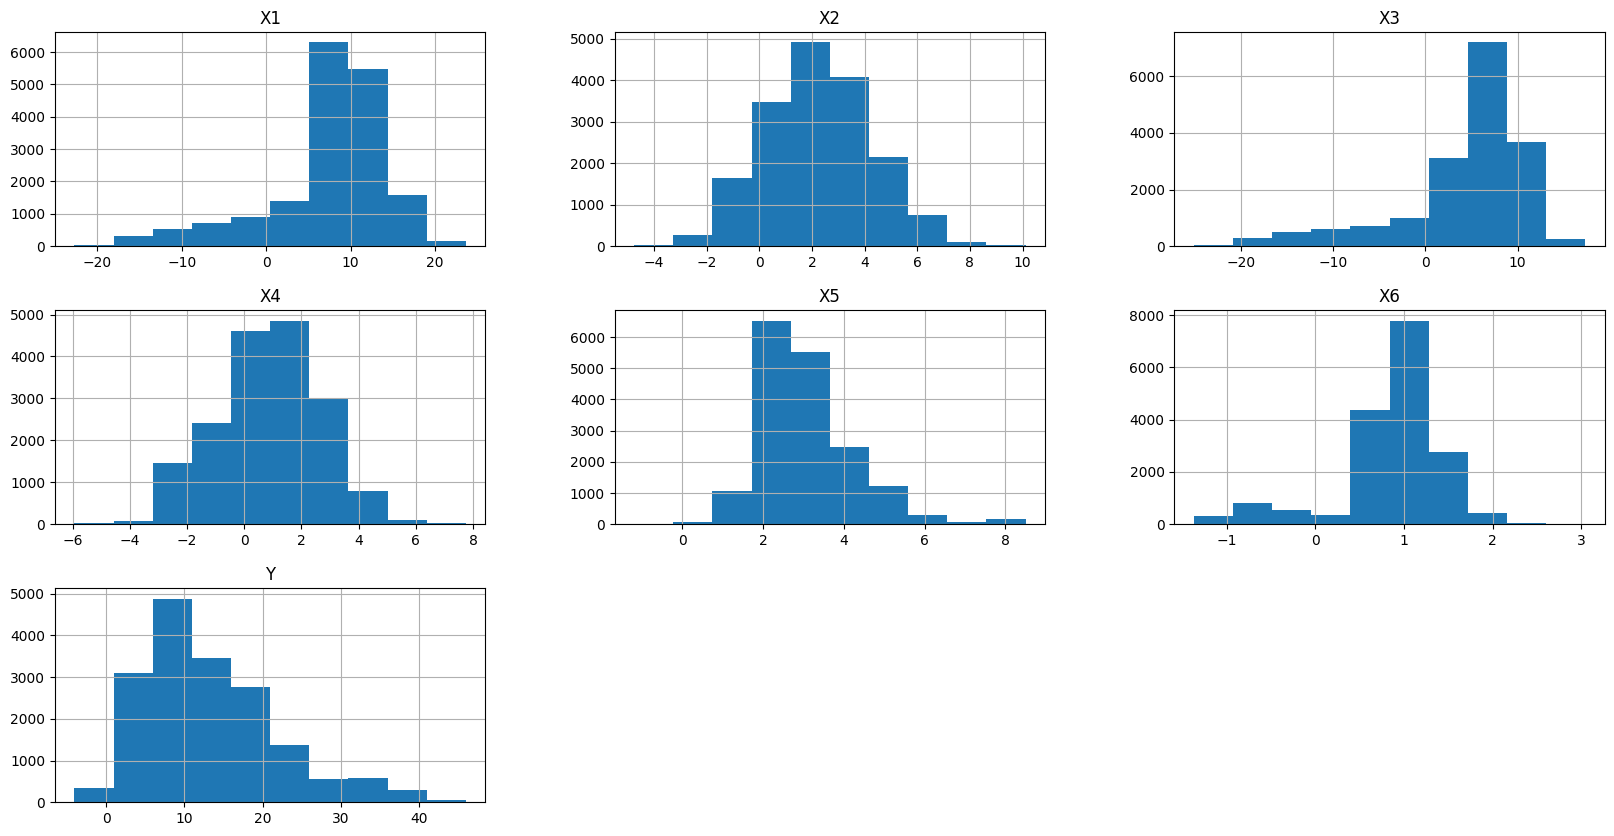

In [320]:
df.hist(figsize=(20,10))
plt.show()

#### The Density Plots for all the variables

/var/folders/mv/39f6vvvn1kb8pjc2zbvyxr5w0000gn/T/ipykernel_4120/3741324528.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fig = sns.kdeplot(df, shade=True)


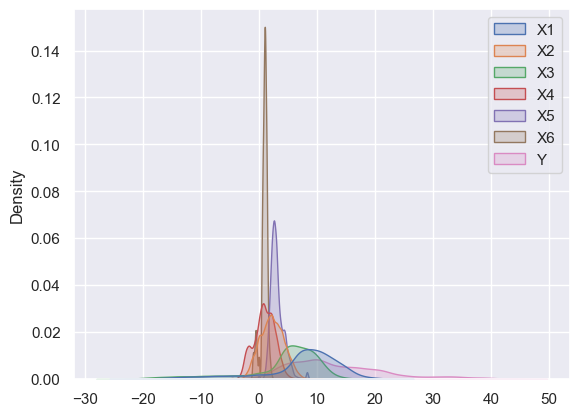

In [321]:
sns.set(style="darkgrid")
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(df, shade=True)
plt.show()

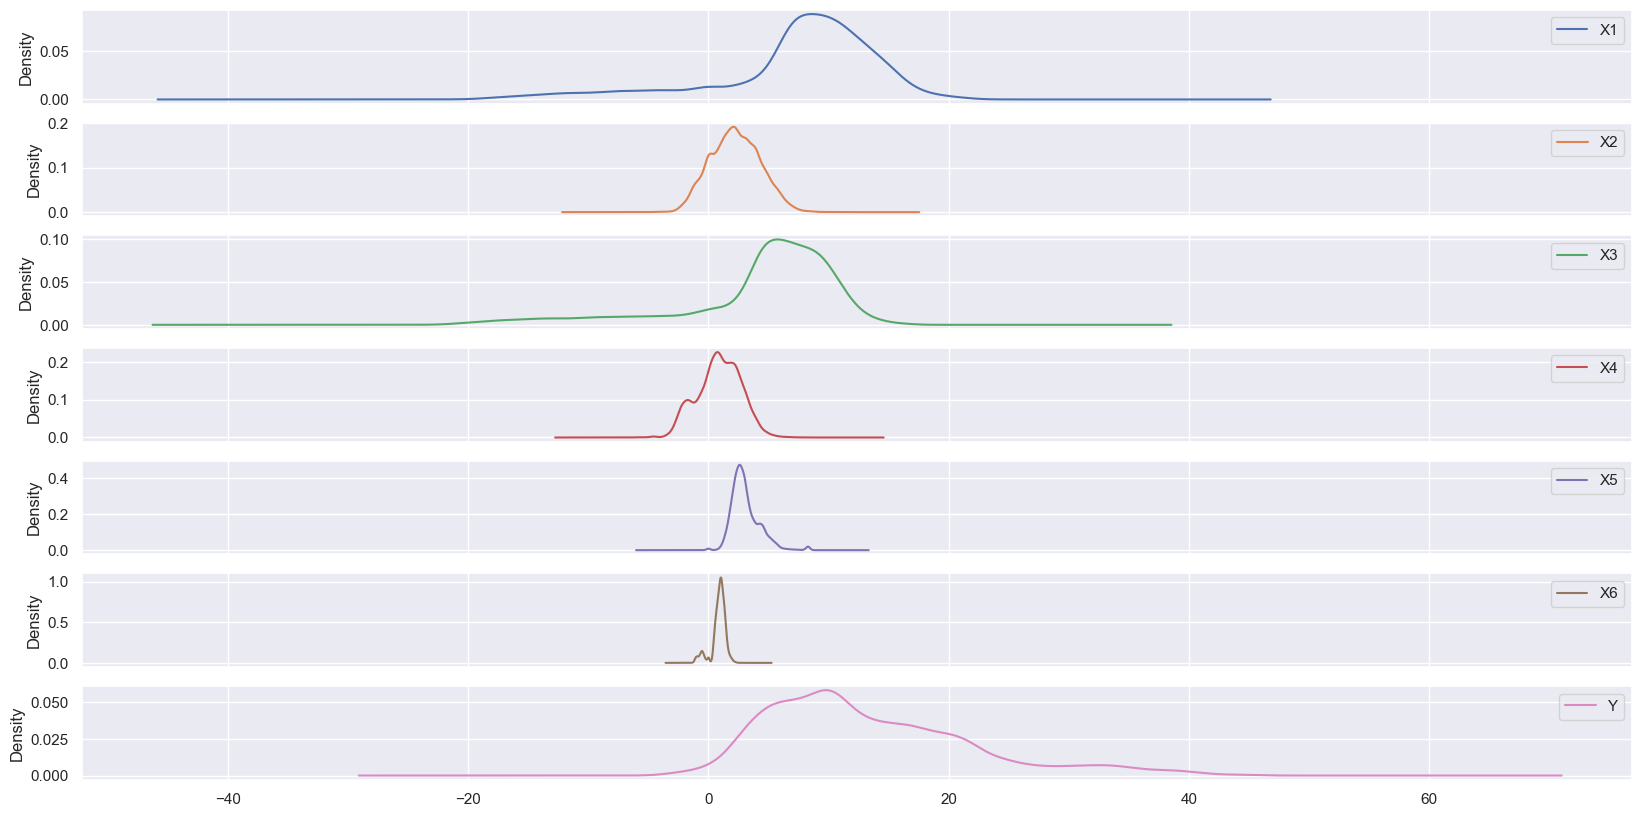

In [322]:
df.plot(kind='kde',subplots=True,figsize=(20,10))
plt.show()

The summary statistics before standardising the data set

In [323]:
# Print the summary statistics of the DataFrame
print(df.describe())

                 X1            X2            X3            X4            X5  \
count  17420.000000  17420.000000  17420.000000  17420.000000  17420.000000   
mean       7.375141      2.242242      4.300239      0.881568      3.066062   
std        7.067744      2.042342      6.826978      1.809293      1.164506   
min      -22.705999     -4.756000    -25.087999     -5.934000     -1.188000   
25%        5.827000      0.737000      3.296000     -0.284000      2.315000   
50%        8.774000      2.210000      5.970000      0.959000      2.833000   
75%       11.788000      3.684000      8.635000      2.203000      3.625000   
max       23.643999     10.114000     17.341000      7.747000      8.498000   

                 X6             Y  
count  17420.000000  17420.000000  
mean       0.856932     13.324672  
std        0.599552      8.566946  
min       -1.371000     -4.080000  
25%        0.670000      6.964000  
50%        0.975000     11.396000  
75%        1.218000     18.079000  


The summary statistics after standardising the data set

In [324]:
normalized_df=(df-df.mean())/df.std()
print(normalized_df.describe())

                 X1            X2            X3            X4            X5  \
count  1.742000e+04  1.742000e+04  1.742000e+04  1.742000e+04  1.742000e+04   
mean  -1.631556e-18 -5.220980e-17  3.915735e-17 -1.305245e-17 -3.263112e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -4.256116e+00 -3.426577e+00 -4.304721e+00 -3.766977e+00 -3.653105e+00   
25%   -2.190432e-01 -7.370177e-01 -1.470986e-01 -6.442115e-01 -6.449619e-01   
50%    1.979215e-01 -1.578696e-02  2.445827e-01  4.279696e-02 -2.001381e-01   
75%    6.243660e-01  7.059334e-01  6.349458e-01  7.303582e-01  4.799787e-01   
max    2.301846e+00  3.854279e+00  1.910180e+00  3.794538e+00  4.664586e+00   

                 X6             Y  
count  1.742000e+04  1.742000e+04  
mean  -6.526225e-17 -9.789337e-18  
std    1.000000e+00  1.000000e+00  
min   -3.715996e+00 -2.031607e+00  
25%   -3.117864e-01 -7.424666e-01  
50%    1.969269e-01 -2.251294e-01  
75%    6.022297e-01  5.549619e-01  



 The correlation matrix:



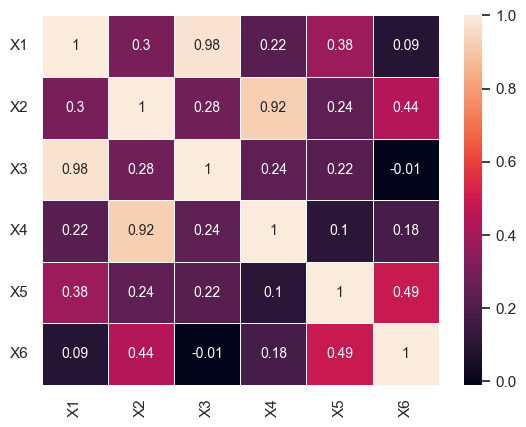

In [325]:
# Correlation among the features given
correlation_matrix = df[['X1', 'X2','X3','X4','X5','X6']].corr(method='spearman')
print("\n The correlation matrix:\n")
# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(correlation_matrix, annot=True, linewidths=0.4, annot_kws={'size': 10});
plt.xticks(rotation=90);
plt.yticks(rotation=0);
correlation_matrix = df[['X1', 'X2','X3','X4','X5','X6']].corr(method='spearman')
# correlation_matrix

Since there are negative values in all the variates of the given dataset we cannot use multiplicative model, moreover, it is evident from the trends plot that the data set does not exhibit multiplicative seasonality.

Plotting the trend, seasonality and residuals for all the variates of the given dataset that is from X1 to X6

<AxesSubplot:xlabel='date'>

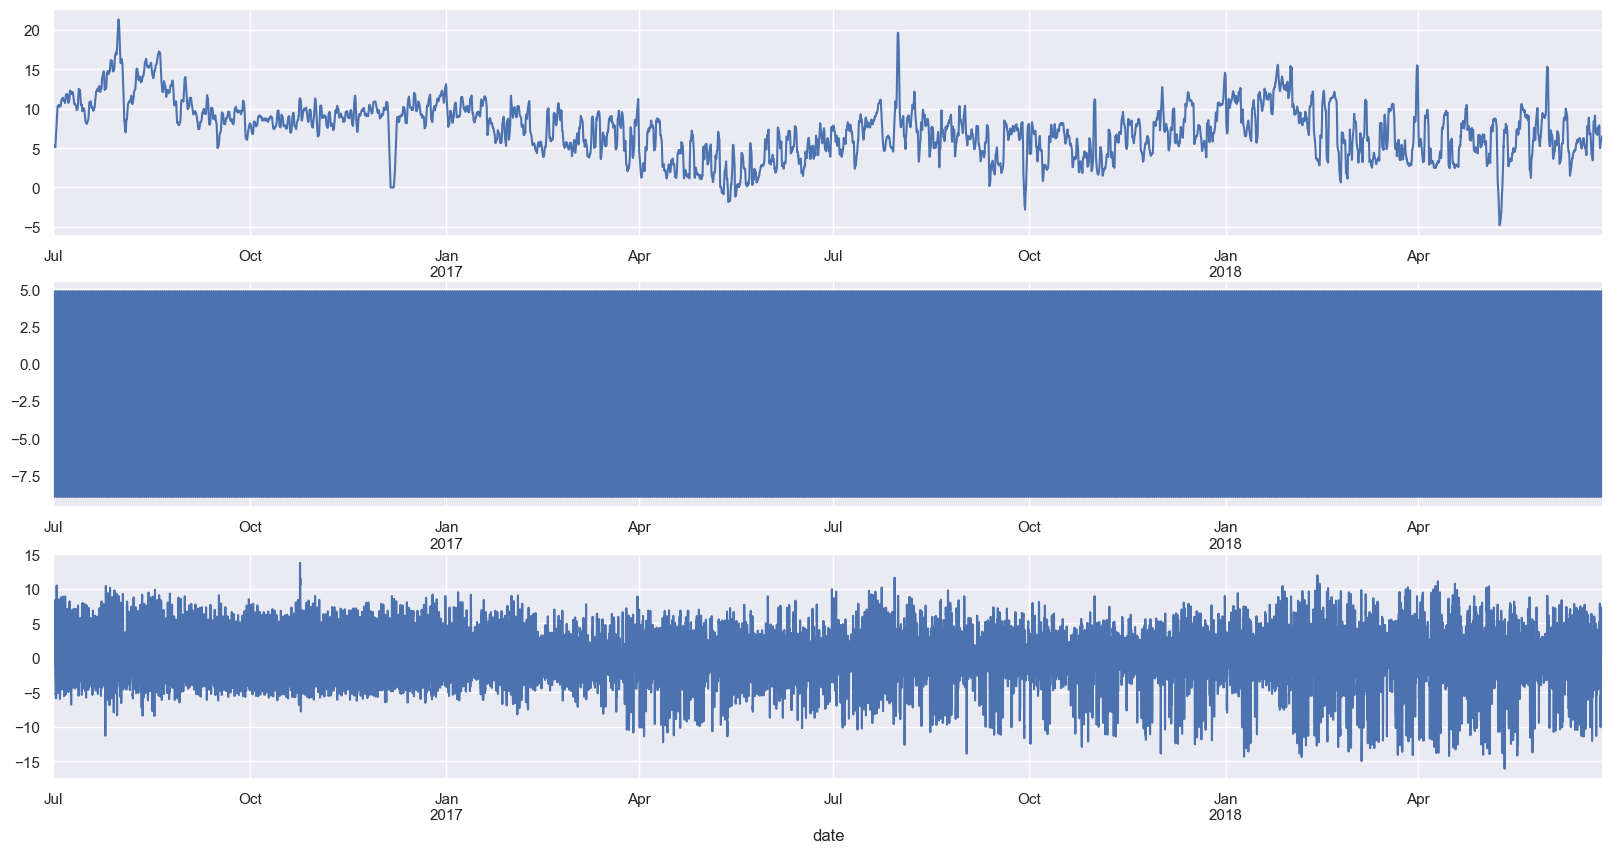

In [326]:
from statsmodels.tsa.seasonal import seasonal_decompose

analysis_X1 = df[['X1']].copy()

plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
decompose_result_mult = seasonal_decompose(analysis_X1, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
# decompose_result_mult.plot(subplots = True);
trend.plot()
plt.subplot(3,1,2)
seasonal.plot()
plt.subplot(3,1,3)
residual.plot()


<AxesSubplot:xlabel='date'>

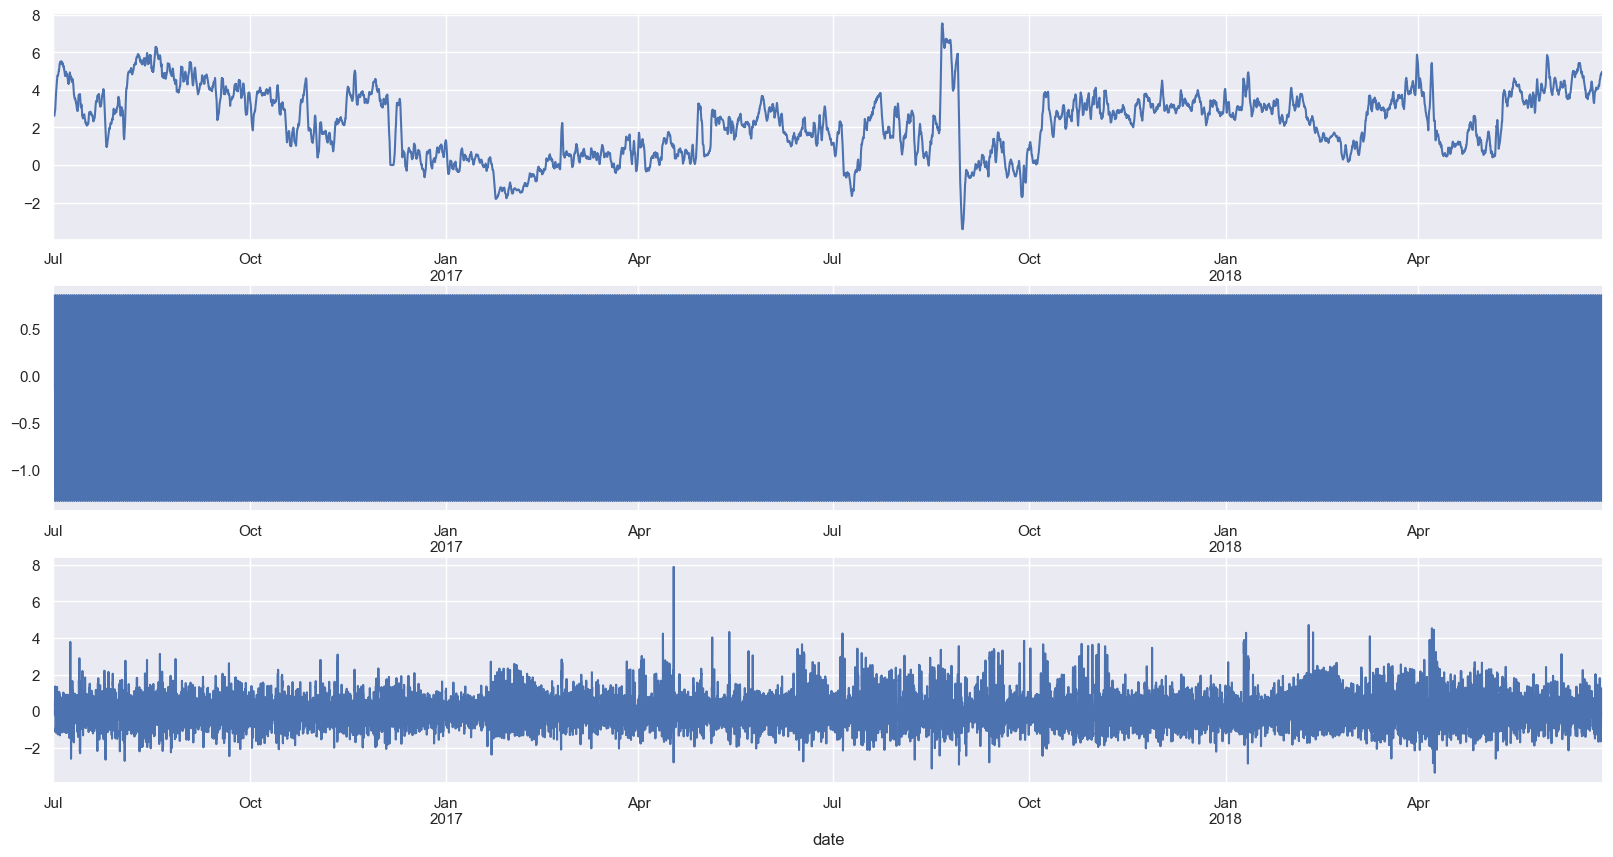

In [327]:
from statsmodels.tsa.seasonal import seasonal_decompose

analysis_X2 = df[['X2']].copy()

plt.figure(figsize=(20,10))
decompose_result_mult = seasonal_decompose(analysis_X2, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
# decompose_result_mult.plot(subplots = True);
plt.subplot(3,1,1)
trend.plot()
plt.subplot(3,1,2)
seasonal.plot()
plt.subplot(3,1,3)
residual.plot()


<AxesSubplot:xlabel='date'>

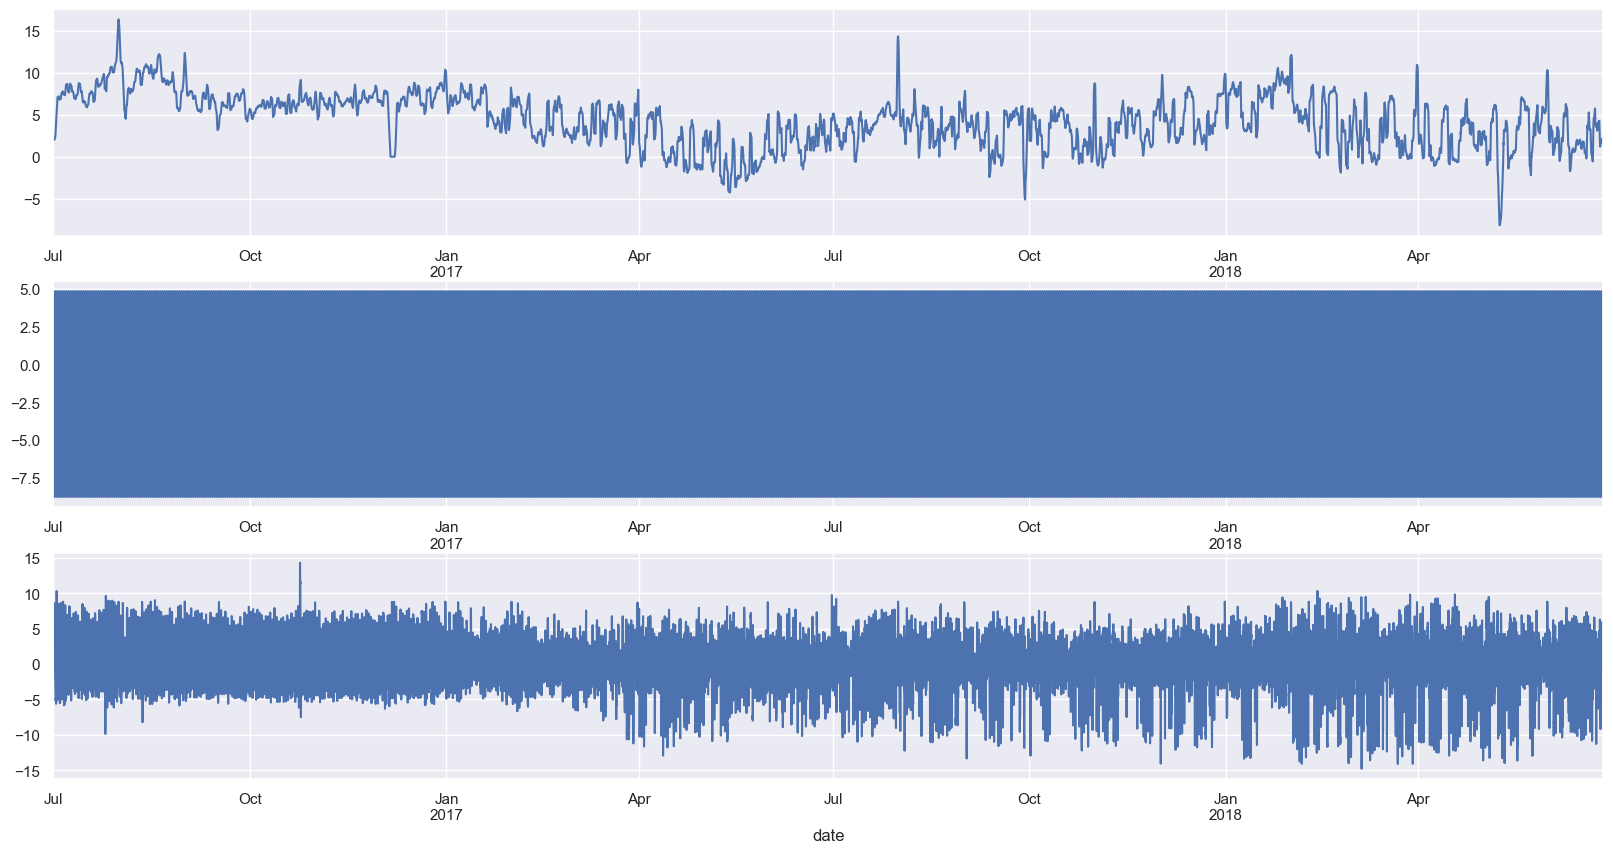

In [328]:
analysis_X3 = df[['X3']].copy()

plt.figure(figsize=(20,10))
decompose_result_mult = seasonal_decompose(analysis_X3, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
# decompose_result_mult.plot(subplots = True);
plt.subplot(3,1,1)
trend.plot()
plt.subplot(3,1,2)
seasonal.plot()
plt.subplot(3,1,3)
residual.plot()

<AxesSubplot:xlabel='date'>

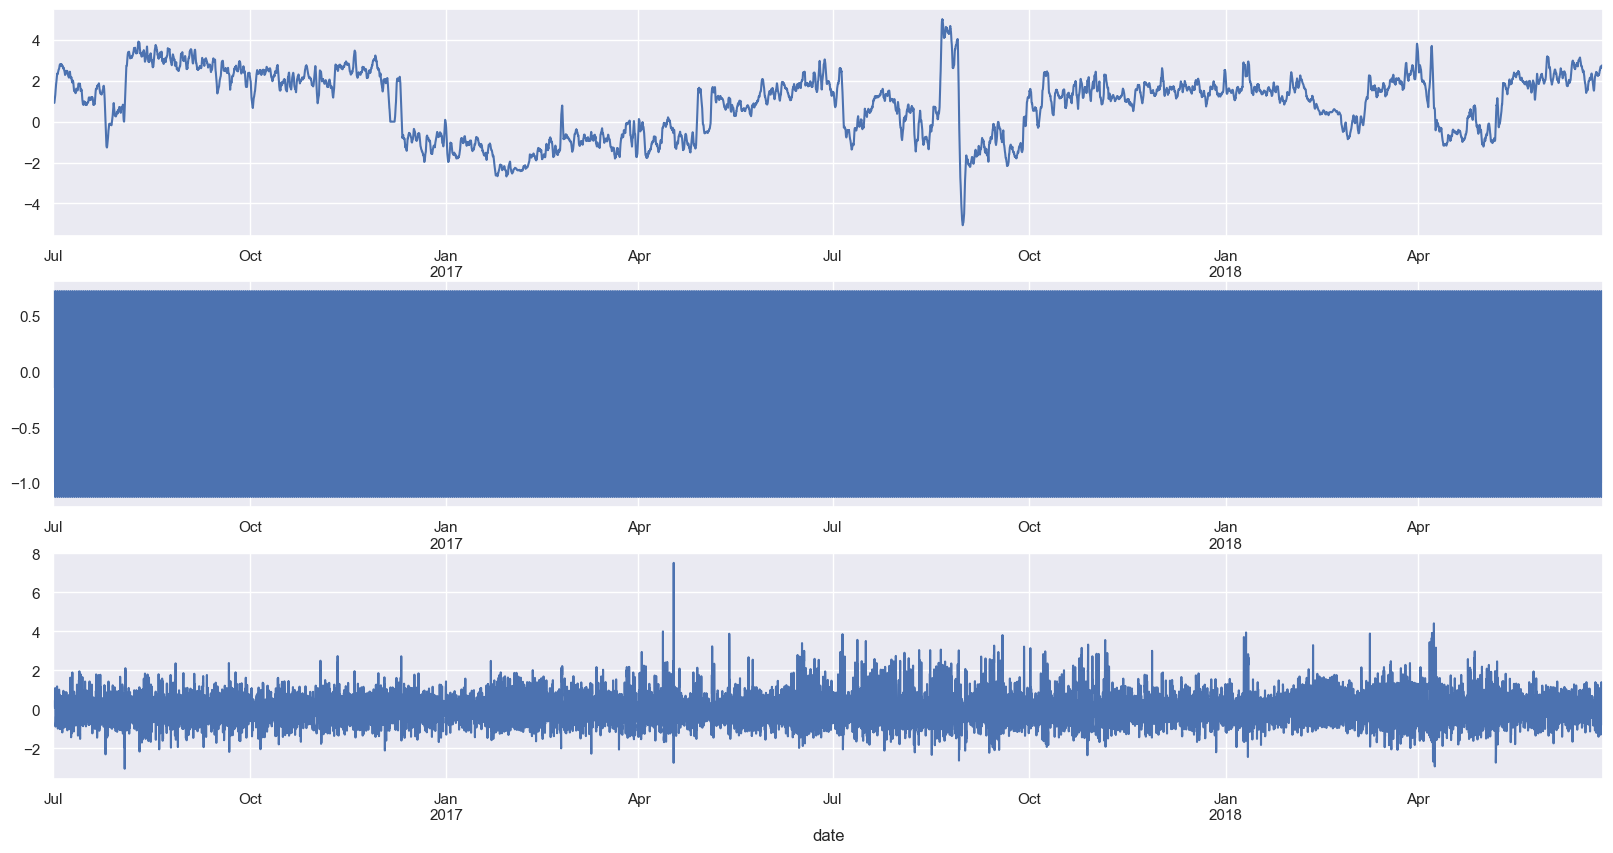

In [329]:
analysis_X4 = df[['X4']].copy()

plt.figure(figsize=(20,10))
decompose_result_mult = seasonal_decompose(analysis_X4, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
# decompose_result_mult.plot(subplots = True);
plt.subplot(3,1,1)
trend.plot()
plt.subplot(3,1,2)
seasonal.plot()
plt.subplot(3,1,3)
residual.plot()

<AxesSubplot:xlabel='date'>

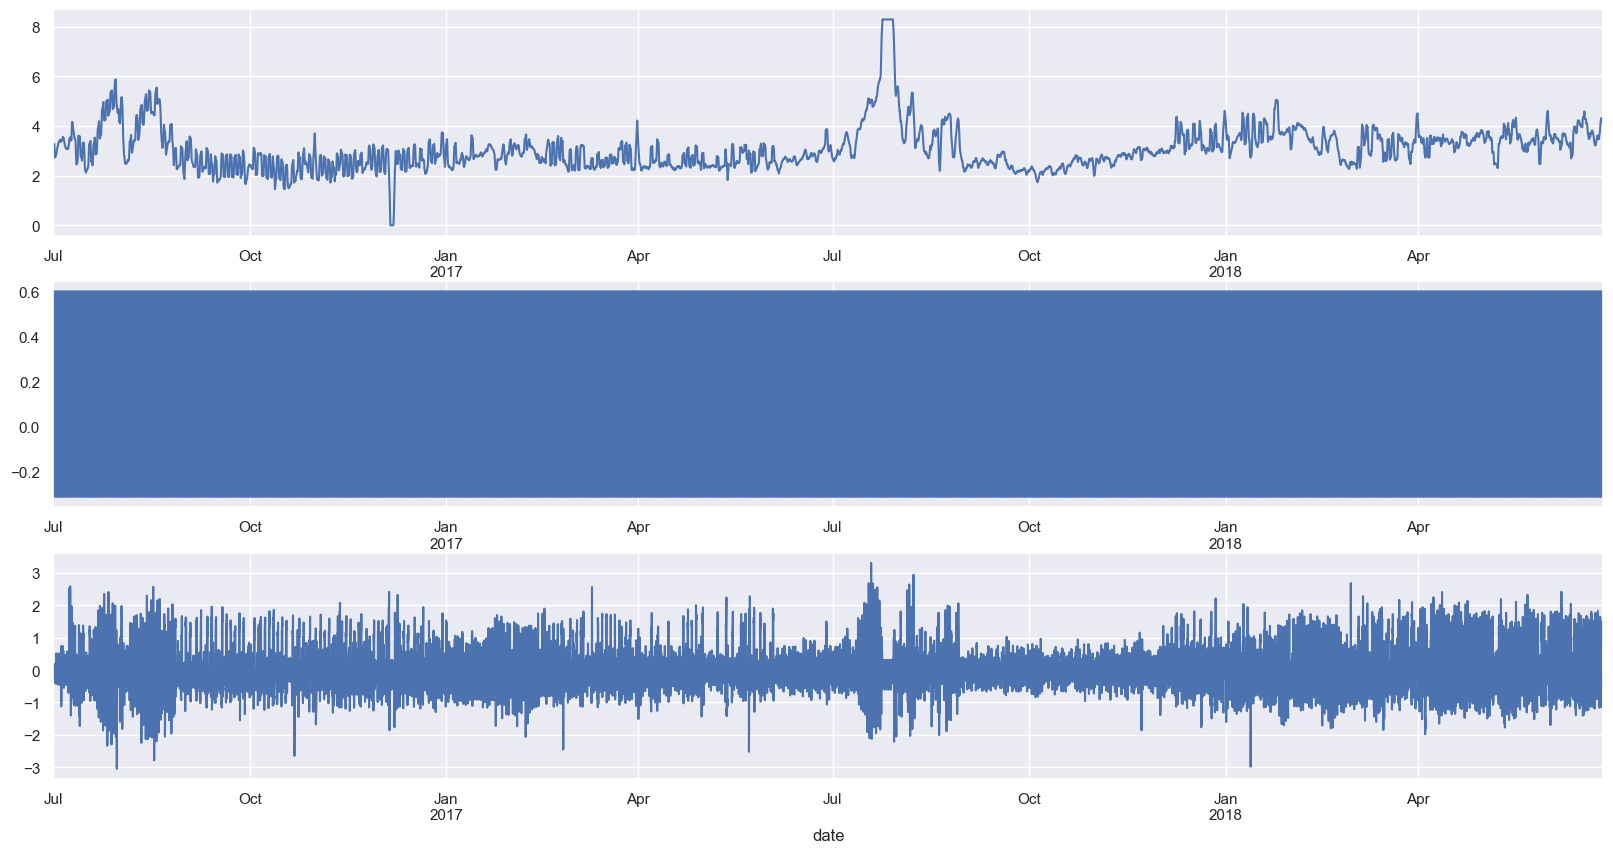

In [330]:
analysis_X5 = df[['X5']].copy()

plt.figure(figsize=(20,10))
decompose_result_mult = seasonal_decompose(analysis_X5, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
# decompose_result_mult.plot(subplots = True);
plt.subplot(3,1,1)
trend.plot()
plt.subplot(3,1,2)
seasonal.plot()
plt.subplot(3,1,3)
residual.plot()

<AxesSubplot:xlabel='date'>

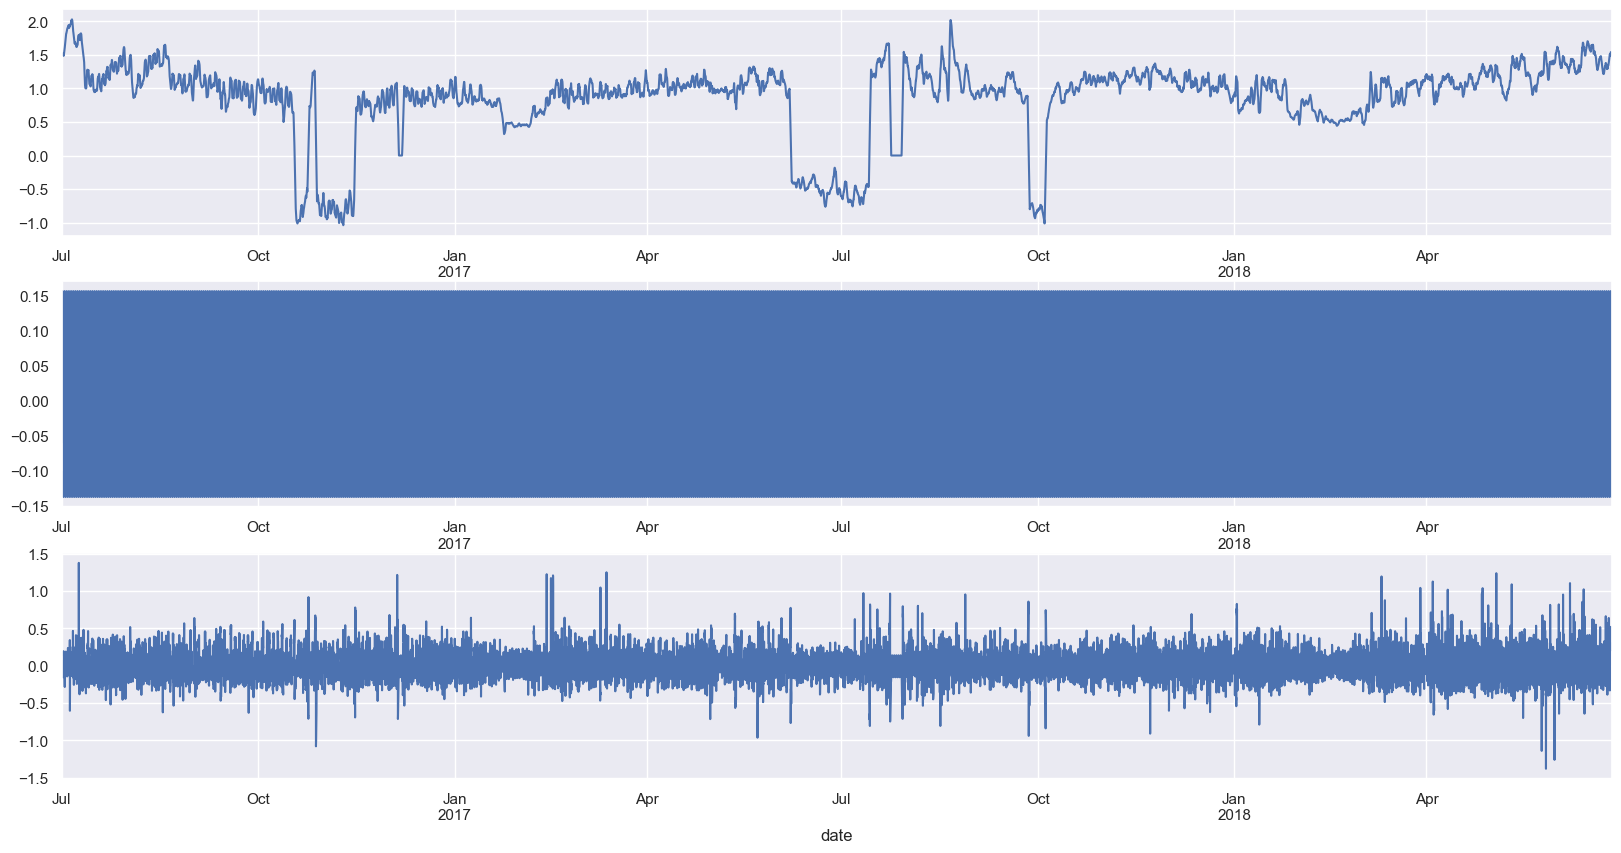

In [331]:
analysis_X6 = df[['X6']].copy()

plt.figure(figsize=(20,10))
decompose_result_mult = seasonal_decompose(analysis_X6, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
# decompose_result_mult.plot(subplots = True);
plt.subplot(3,1,1)
trend.plot()
plt.subplot(3,1,2)
seasonal.plot()
plt.subplot(3,1,3)
residual.plot()

In [332]:
from datetime import datetime
# date = datetime.now()
df.index = pd.to_datetime(df.index)
df.index = df.index.strftime("%Y-%m-%d")
df.head()

,X1,X2,X3,X4,X5,X6,Y
date,,,,,,,
2016-07-01,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2016-07-01,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
2016-07-01,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
2016-07-01,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


2. [1.5 points] Train/Test split : As a next step, try to split the data into train, validation and test by considering the following rules - <br>
a) train end : 2017-06-26<br> b) val end : 2017-10-24<br>
c) test end : 2018-02-21<br>
Draw a single plot of the entire time series (for the target variable) and mark clearly within the plot, the train end, the val end and the test end.<br>
From now on, you are working with the train, test and validation dataset.

#### The training dataset

In [333]:
# Training Data Set
print("\nThe First Few Elements Of The Training Dataset:\n")
# train = df.loc[:'2017-06-26']
train = df[:'2017-06-26']
print(train.head(10))
print("\nThe Shape Of The Training Dataset:\n")
print(train.shape)


The First Few Elements Of The Training Dataset:

               X1     X2     X3     X4     X5     X6          Y
date                                                           
2016-07-01  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
2016-07-01  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2016-07-01  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
2016-07-01  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
2016-07-01  5.358  1.942  1.492  0.462  3.868  1.279  21.948000
2016-07-01  5.626  2.143  1.528  0.533  4.051  1.371  21.174000
2016-07-01  7.167  2.947  2.132  0.782  5.026  1.858  22.792000
2016-07-01  7.435  3.282  2.310  1.031  5.087  2.224  23.143999
2016-07-01  5.559  3.014  2.452  1.173  2.955  1.432  21.667000
2016-07-01  4.555  2.545  1.919  0.817  2.680  1.371  17.445999

The Shape Of The Training Dataset:

(8664, 7)


### The Validation dataset

In [334]:
# Validation Data Set
print("\nThe First Few Elements Of The Validation Dataset:\n")
# validation = df.loc['2017-06-27':'2017-10-24']
validation = df['2017-06-27':'2017-10-24']
print(validation.head(10))
print("\nThe Shape Of The Validation Dataset:\n")
print(validation.shape)



The First Few Elements Of The Validation Dataset:

                X1     X2      X3     X4     X5     X6          Y
date                                                             
2017-06-27  11.855  3.081   8.884  2.843  2.680 -0.487  19.697001
2017-06-27  13.262  4.220  10.554  3.873  2.619 -0.579  19.979000
2017-06-27  12.860  3.751  10.163  3.625  2.589 -0.518  19.768000
2017-06-27  12.391  4.019  10.554  4.158  2.284 -0.579  18.853001
2017-06-27  12.123  3.751   9.559  3.802  2.619 -0.396  18.500999
2017-06-27  13.932  4.153  10.376  3.589  3.107 -0.457  19.205000
2017-06-27  12.592  3.148   9.452  2.594  3.229 -0.305  18.993999
2017-06-27   8.975  3.550   5.899  2.914  3.290 -0.244  18.712000
2017-06-27   3.684  3.684   0.426  3.518  3.411 -0.152  18.712000
2017-06-27   2.143  3.349  -0.569  3.092  3.168 -0.183  18.853001

The Shape Of The Validation Dataset:

(2880, 7)


### The testing dataset

In [335]:
# Testing Dataset
print("\nThe First Few Elements Of The Testing Dataset:\n")
# test = df.loc['2017-10-25':'2018-02-21']
test = df['2017-10-25':'2018-02-21']
print(test.head(10))
print("\nThe Shape Of The Test Dataset:\n")
print(test.shape)


The First Few Elements Of The Testing Dataset:

                X1     X2     X3     X4     X5     X6      Y
date                                                        
2017-10-25  10.315  2.880  8.599  2.274  2.102  1.005  9.145
2017-10-25  11.922  4.354  9.204  2.061  2.437  1.097  8.371
2017-10-25  11.788  3.952  9.346  2.061  2.132  1.005  8.582
2017-10-25  11.855  4.823  9.808  2.168  2.193  1.157  8.090
2017-10-25  12.056  4.086  9.666  2.487  1.949  1.279  7.738
2017-10-25  11.186  4.287  8.315  2.274  2.772  1.279  7.809
2017-10-25  13.128  3.751  9.168  1.848  2.711  1.097  7.457
2017-10-25  11.588  3.885  7.747  2.452  3.320  1.371  7.316
2017-10-25   1.608  4.555 -1.421  2.630  3.015  1.492  7.457
2017-10-25  -6.564  5.224 -9.914  3.625  2.711  1.401  7.668

The Shape Of The Test Dataset:

(2880, 7)


Draw a single plot of the entire time series (for the target variable) and mark clearly within the plot, the train end, the val end and the test end.

['2016-07-01', '2016-09-11', '2016-11-23', '2017-02-03', '2017-04-17', '2017-06-28', '2017-09-09', '2017-11-21', '2018-02-01', '2018-04-15']


[]

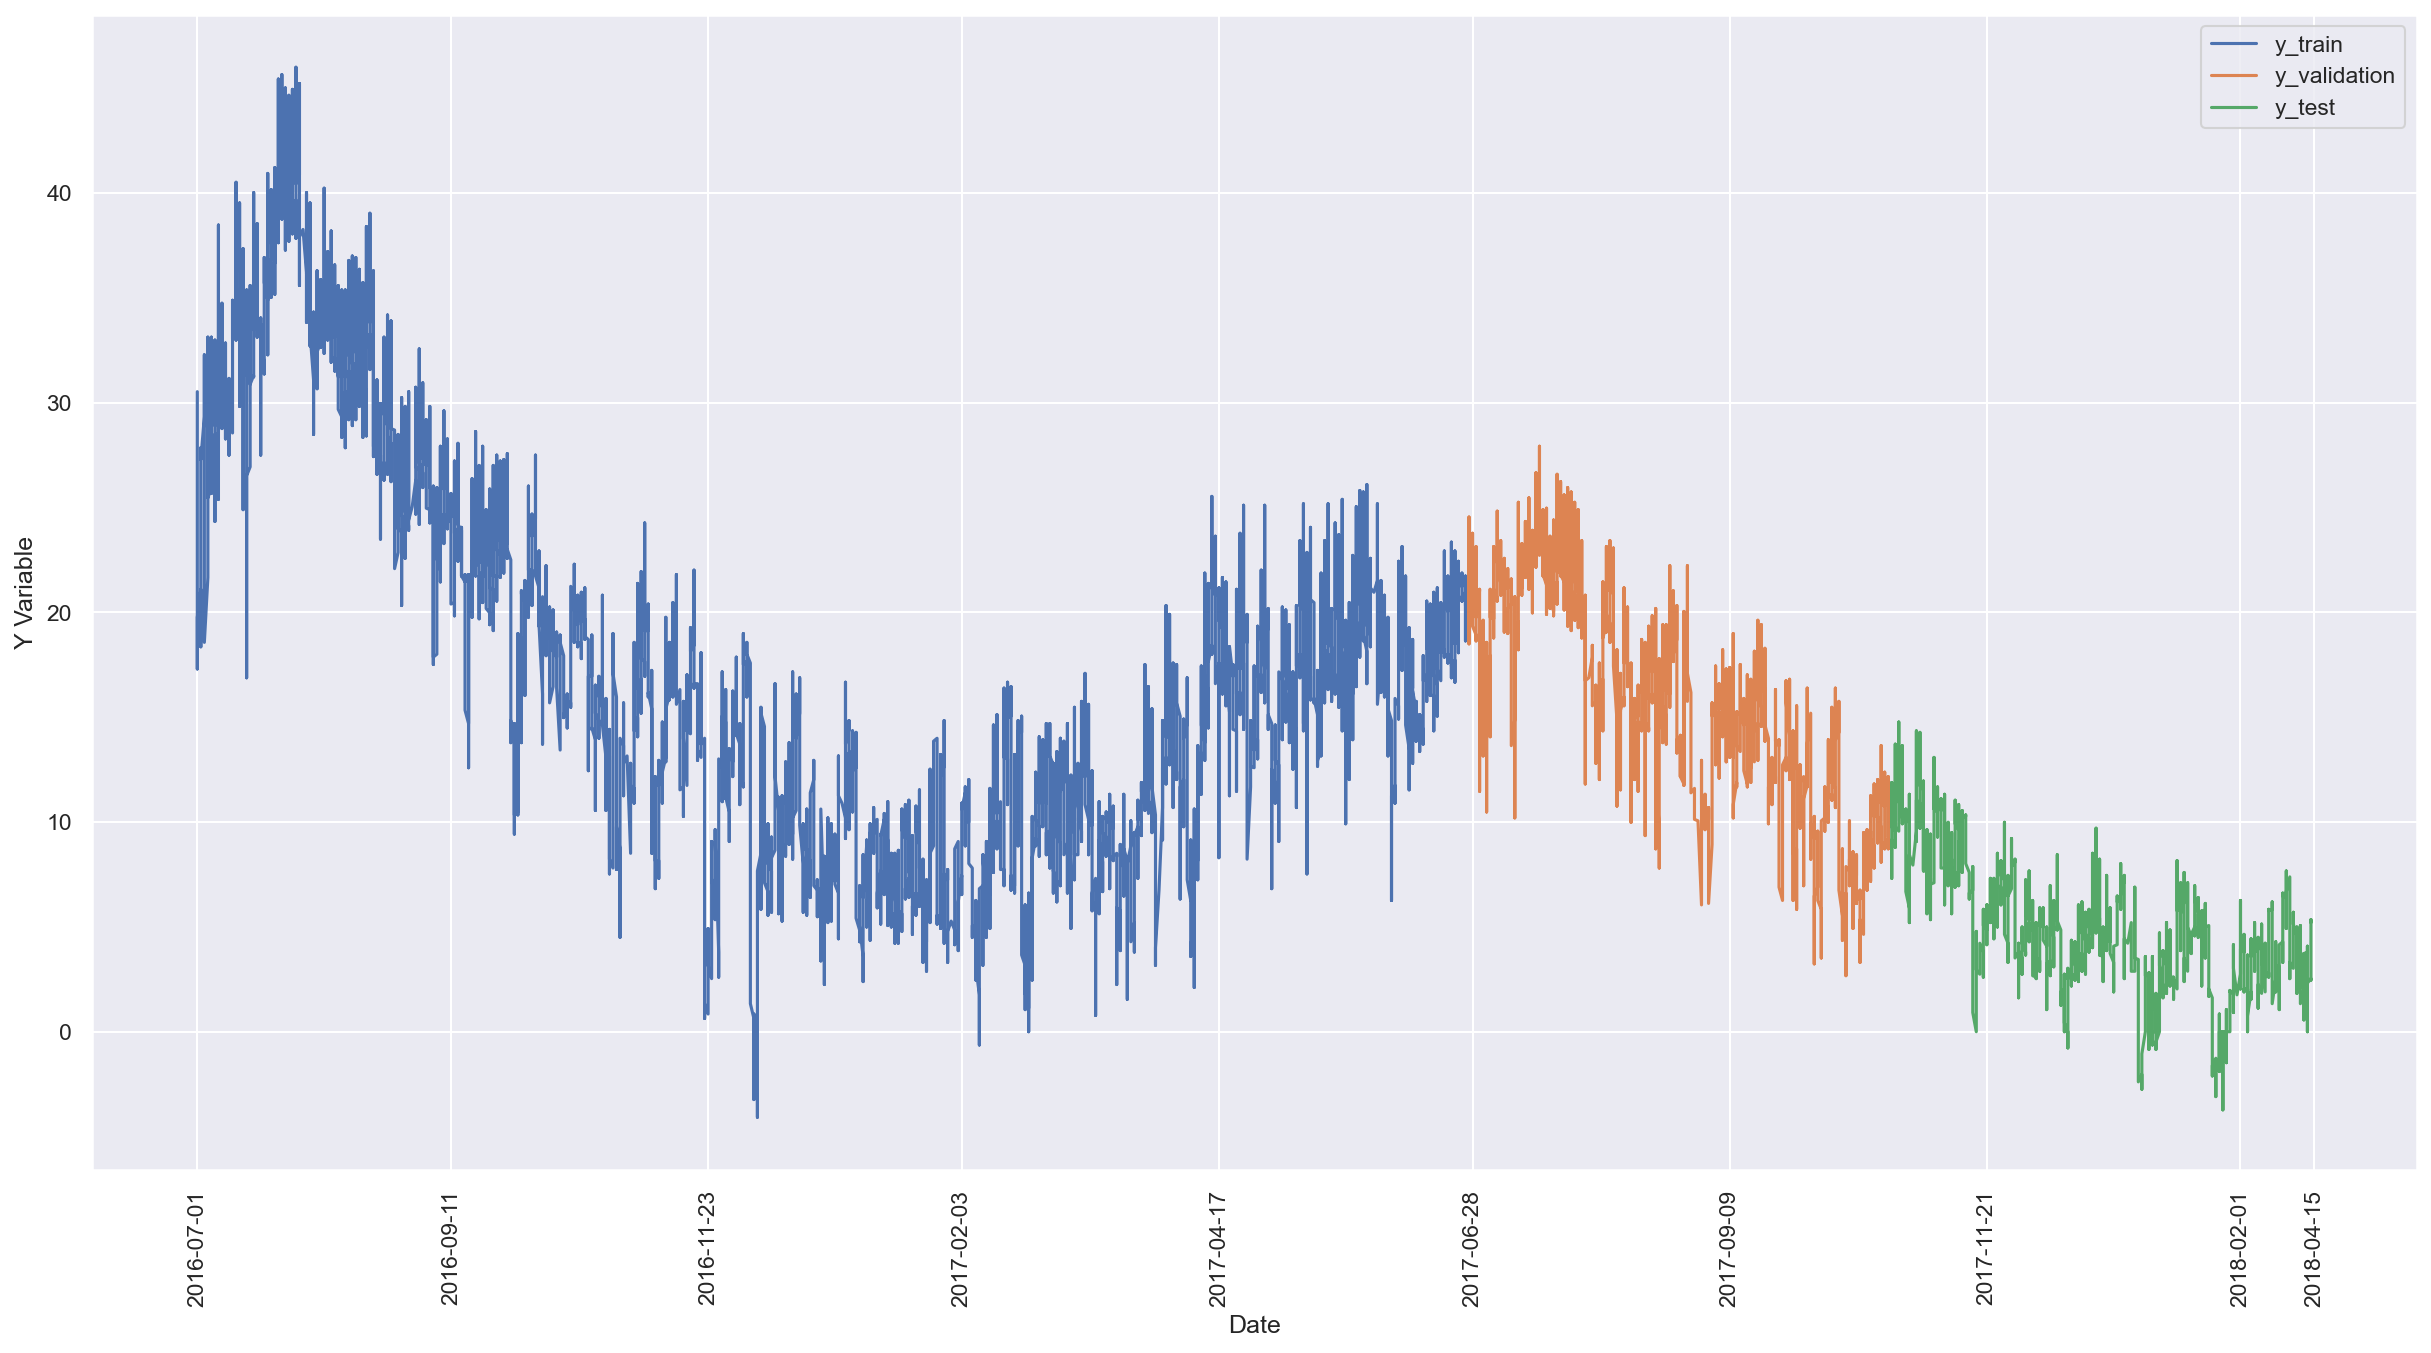

In [336]:
from matplotlib.pyplot import figure
plt.figure(figsize=(20, 10), dpi=150)
datelist = list(df.index)
ticks = np.arange(0, 17420, 1742)
labels = []
for i in ticks:
    labels.append(datelist[i])
print(labels)

plt.plot(train[['Y']])
plt.plot(validation[['Y']])
plt.plot(test[['Y']])
plt.xticks(labels, rotation = 450)
plt.xlabel("Date")
plt.ylabel("Y Variable")
plt.legend(['y_train','y_validation', 'y_test'])
plt.plot()


In [337]:
# Scaling the entire dataset
normalized_df=(df-df.mean())/df.std()
normalized_df

,X1,X2,X3,X4,X5,X6,Y
date,,,,,,,
2016-07-01,-0.219043,-0.114203,-0.395671,-0.231896,0.976327,0.805715,2.008455
2016-07-01,-0.238003,-0.081398,-0.411344,-0.251793,0.923944,0.857420,1.688155
2016-07-01,-0.313840,-0.245425,-0.442544,-0.291035,0.610506,0.602230,1.688155
2016-07-01,-0.323320,-0.147009,-0.442544,-0.271138,0.636268,0.703972,1.367970
2016-07-01,-0.285401,-0.147009,-0.411344,-0.231896,0.688651,0.703972,1.006581
...,...,...,...,...,...,...,...
2018-06-26,-1.280344,0.640322,-1.452361,0.691116,0.348592,1.110943,-0.282559
2018-06-26,-1.820544,1.001183,-1.967523,0.769600,0.400975,1.364466,-0.266218
2018-06-26,-0.645488,0.771544,-0.749561,0.671772,0.558123,1.110943,-0.356448


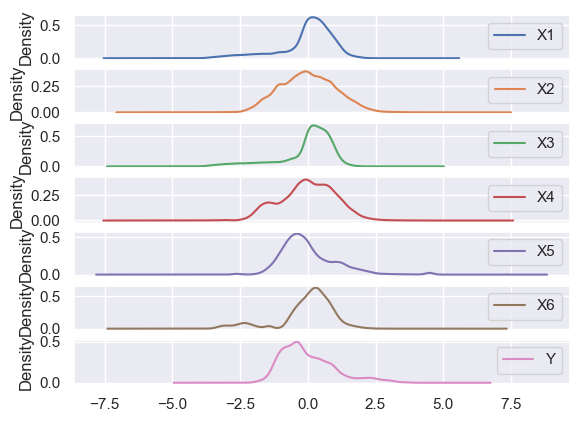

In [338]:
normalized_df.plot(kind='kde',subplots=True)
plt.show()

### Scaling For Train Dataset

In [339]:
normalized_train_df=(train-train.mean())/train.std()
normalized_train_df

,X1,X2,X3,X4,X5,X6,Y
date,,,,,,,
2016-07-01,-0.362710,-0.005913,-0.630084,-0.149838,1.389195,0.876938,1.461347
2016-07-01,-0.385772,0.026177,-0.649475,-0.168529,1.329536,0.925915,1.161972
2016-07-01,-0.478019,-0.134274,-0.688076,-0.205391,0.972558,0.684189,1.161972
2016-07-01,-0.489550,-0.038003,-0.688076,-0.186700,1.001899,0.780564,0.862706
2016-07-01,-0.443426,-0.038003,-0.649475,-0.149838,1.061558,0.780564,0.524928
...,...,...,...,...,...,...,...
2017-06-26,0.271320,-0.326335,0.258659,0.496027,0.465944,-2.154904,0.256320
2017-06-26,0.490408,-0.390515,0.413246,0.256164,1.032218,-2.154904,0.310107
2017-06-26,0.317443,-0.486786,0.310128,0.532889,0.197966,-2.202301,0.340765


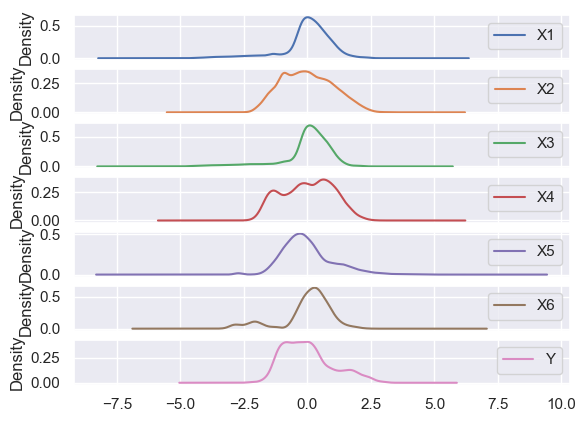

In [340]:
normalized_train_df.plot(kind='kde',subplots=True)
plt.show()

### Scaling For Validation Dataset

In [341]:
normalized_validation_df=(validation-validation.mean())/validation.std()
normalized_validation_df

,X1,X2,X3,X4,X5,X6,Y
date,,,,,,,
2017-06-27,0.739005,0.694476,0.754053,1.236336,-0.439934,-1.504280,0.843571
2017-06-27,0.931172,1.205312,0.983595,1.749566,-0.478505,-1.622522,0.900172
2017-06-27,0.876267,0.994968,0.929852,1.625992,-0.497475,-1.544123,0.857821
2017-06-27,0.812211,1.115165,0.983595,1.891576,-0.690334,-1.622522,0.674169
2017-06-27,0.775608,0.994968,0.846832,1.714188,-0.478505,-1.387323,0.603518
...,...,...,...,...,...,...,...
2017-10-24,0.245135,-0.176502,0.109275,-0.268971,0.099438,0.491703,-0.822546
2017-10-24,0.217683,-0.116404,0.163018,-0.268971,0.003325,0.805302,-0.935548
2017-10-24,0.052969,-0.056305,0.192295,-0.162339,-0.478505,0.726902,-0.935548


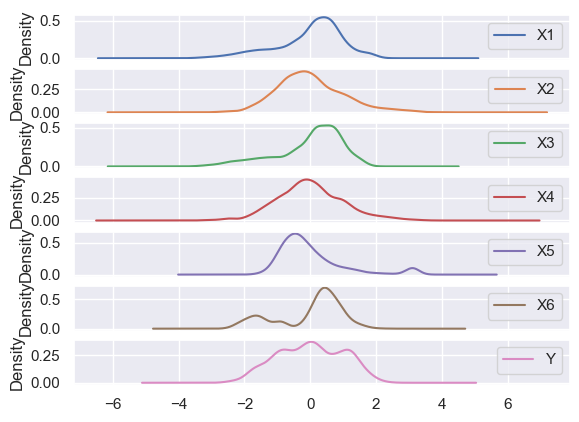

In [342]:
normalized_validation_df.plot(kind='kde',subplots=True)
plt.show()

### Scaling For Test Dataset

In [343]:
normalized_test_df=(test-test.mean())/test.std()
normalized_test_df

,X1,X2,X3,X4,X5,X6,Y
date,,,,,,,
2017-10-25,0.278553,-0.064483,0.510387,0.815098,-1.304893,0.133449,1.397291
2017-10-25,0.489880,1.134056,0.592424,0.604572,-0.938679,0.436160,1.148831
2017-10-25,0.472258,0.807181,0.611678,0.604572,-1.272098,0.133449,1.216564
2017-10-25,0.481069,1.515409,0.674325,0.710329,-1.205414,0.633579,1.058628
2017-10-25,0.507501,0.916140,0.655070,1.025625,-1.472149,1.035000,0.945634
...,...,...,...,...,...,...,...
2018-02-21,1.009582,-0.554795,0.818873,-0.624984,1.857664,-1.268232,-0.296343
2018-02-21,1.124122,-0.336879,0.910402,-0.484633,2.057716,-1.169522,-0.183349
2018-02-21,1.194608,-0.118963,0.973048,-0.343293,2.124399,-1.169522,0.177784


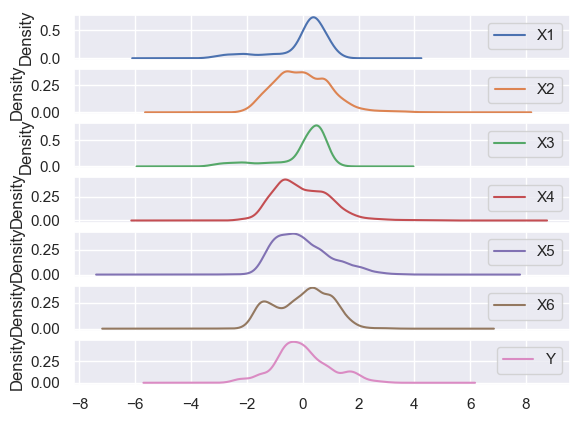

In [344]:
normalized_test_df.plot(kind='kde',subplots=True)
plt.show()

4. [6 points] Regression : Next, implement learn a linear regression model using Normal Equations using the algorithm below.<br>
learn-linreg-NormEq(Dtrain := {(x1,y1),...,(xN,yN)}): X := (x1,x2,...,xN)T<br>
y := (y1,y2,...,yN)T<br>
A := XTranspose X<br>
b := XTranspose y<br>
βˆ := solve-SLE(A, b) return βˆ<br>

In [345]:
# obtain the feature matrix as a numpy array
X = normalized_train_df[['X1','X2','X3','X4','X5','X6']]
# obtain the target variable as a numpy array
y = normalized_train_df[['Y']]
m = y.shape
print(" The Shape of Y Matrix: ", m)

 The Shape of Y Matrix:  (8664, 1)


Working with the training dataset only 

In [346]:
print("\n The Training Dataset\n")
normalized_train_df


 The Training Dataset



,X1,X2,X3,X4,X5,X6,Y
date,,,,,,,
2016-07-01,-0.362710,-0.005913,-0.630084,-0.149838,1.389195,0.876938,1.461347
2016-07-01,-0.385772,0.026177,-0.649475,-0.168529,1.329536,0.925915,1.161972
2016-07-01,-0.478019,-0.134274,-0.688076,-0.205391,0.972558,0.684189,1.161972
2016-07-01,-0.489550,-0.038003,-0.688076,-0.186700,1.001899,0.780564,0.862706
2016-07-01,-0.443426,-0.038003,-0.649475,-0.149838,1.061558,0.780564,0.524928
...,...,...,...,...,...,...,...
2017-06-26,0.271320,-0.326335,0.258659,0.496027,0.465944,-2.154904,0.256320
2017-06-26,0.490408,-0.390515,0.413246,0.256164,1.032218,-2.154904,0.310107
2017-06-26,0.317443,-0.486786,0.310128,0.532889,0.197966,-2.202301,0.340765


For solving the Linear Equations (the function solve-SLE), use<br>
a) Gaussian Elimination (implemented in pure python i.e., only numpy)

In [347]:
# Creating Vector of ones
const_col = np.ones((m))
# and adding it to the feature matrix
X = np.concatenate((const_col, X), 1)

In [348]:
print("The Final Matrix \n:", X)
print("\n The shape of the above matrix :\n", X.shape)


The Final Matrix 
: [[ 1.         -0.36270968 -0.0059134  ... -0.14983825  1.38919541
   0.87693787]
 [ 1.         -0.3857716   0.02617663 ... -0.16852888  1.32953626
   0.92591502]
 [ 1.         -0.47801905 -0.13427368 ... -0.20539094  0.97255837
   0.68418923]
 ...
 [ 1.          0.31744346 -0.48678552 ...  0.53288859  0.19796572
  -2.20230124]
 [ 1.          0.24825778 -0.26215504 ...  0.32988771  0.2869657
  -2.15490398]
 [ 1.          0.36356715  0.02617663 ...  0.84647573  0.10896597
  -1.86578098]]

 The shape of the above matrix :
 (8664, 7)


In [349]:
# Calculating b for the equation Ax=b
b = X.transpose().dot(y)
print("\n The b vector is :\n", b , "\n The shape of this vector is :\n", b.shape)


 The b vector is :
 [[-3.07309733e-13]
 [ 1.72675045e+03]
 [ 5.20846310e+03]
 [ 1.29726130e+03]
 [ 4.53567346e+03]
 [ 2.73647832e+03]
 [ 2.42528233e+03]] 
 The shape of this vector is :
 (7, 1)


In [350]:
# Calculating b for the equation Ax=b
A = X.transpose().dot(X)
print("\n The newly computed A Matrix is :\n", A , " \n The shape of the above matrix :\n", A.shape)


 The newly computed A Matrix is :
 [[ 8.66400000e+03  4.76063633e-13  3.01980663e-14  1.77635684e-12
   6.25277607e-13 -2.79243295e-12  6.53699317e-13]
 [ 4.76063633e-13  8.66300000e+03  2.00066275e+03  8.52210829e+03
   1.26130554e+03  3.41789591e+03  9.72023407e+02]
 [ 3.01980663e-14  2.00066275e+03  8.66300000e+03  1.69219346e+03
   8.01188783e+03  2.02590925e+03  2.55572479e+03]
 [ 1.77635684e-12  8.52210829e+03  1.69219346e+03  8.66300000e+03
   1.22150215e+03  2.00800945e+03  3.32716445e+02]
 [ 6.25277607e-13  1.26130554e+03  8.01188783e+03  1.22150215e+03
   8.66300000e+03  4.22925007e+02 -3.61520791e+02]
 [-2.79243295e-12  3.41789591e+03  2.02590925e+03  2.00800945e+03
   4.22925007e+02  8.66300000e+03  3.73548541e+03]
 [ 6.53699317e-13  9.72023407e+02  2.55572479e+03  3.32716445e+02
  -3.61520791e+02  3.73548541e+03  8.66300000e+03]]  
 The shape of the above matrix :
 (7, 7)


### Using Numpy Function To Calculate The Coefficients For Verification:

In [351]:
from numpy.linalg import inv
# calculate coefficients using closed-form solution
coeffs = inv(A).dot(b)
print("The coefficents according to the numpy function :\n", coeffs)

The coefficents according to the numpy function :
 [[-1.44371207e-17]
 [-3.15373366e-04]
 [ 2.25661046e-01]
 [ 1.46149538e-02]
 [ 3.10183880e-01]
 [ 1.80987385e-01]
 [ 1.47761850e-01]]


In [352]:
def Gaussian_Elimination(A, b):

    n =  len(A)
    if b.size != n:
        print("Incompatible sizes between A & b.", b.size, n)
    for i in range(0,n-1):
        for row in range(i+1, n):
            multiplier = A[row][i]/A[i][i]
            for col in range(i , n):
                A[row][col] = A[row][col] - multiplier*A[i][col]
            # Equation solution column
            b[row] = b[row] - multiplier*b[i]
#     # print("A :", A)
#     # print("b :", b)
    x = np.zeros(n)
    i = n-1
    # x[i] = b[i]/A[i,i]
    while i >= 0:
        x[i] = (b[i] - np.dot(A[i,i+1:],x[i+1:]))/A[i,i]
        i = i-1
    return x

Finding the coefficients after using Gaussian Method:

In [353]:
betas = Gaussian_Elimination(A, b)
betas

array([-1.44371207e-17, -3.15373366e-04,  2.25661046e-01,  1.46149538e-02,
        3.10183880e-01,  1.80987385e-01,  1.47761850e-01])

### Using Numpy Function To Calculate The QR For Verification:

In [354]:
q, r = np.linalg.qr(A)
print("The Q and R matrix according to the numpy function :\n", q,"\n",r)

The Q and R matrix according to the numpy function :
 [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -1.00000000e+00 -3.81049892e-17]
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -3.81049892e-17  1.00000000e+00]] 
 [[ 8.66400000e+03  4.76063633e-13  3.01980663e-14  1.77635684e-12
   6.25277607e-13 -2.79243295e-12  6.53699317e-13]
 [ 0.00

In [355]:
def qr_decomposition(A):
    #Perform QR decomposition of matrix A using Gram-Schmidt process.
    (num_rows, num_cols) = np.shape(A)
    # Initializing the empty orthogonal matrix Q.
    Q = np.empty([num_rows, num_rows])
    cnt = 0
    # Computing the orthogonal matrix Q.
    for a in A.T:
        u = np.copy(a)
        for i in range(0, cnt):
            proj = np.dot(np.dot(Q[:, i].T, a), Q[:, i])
            u -= proj

        e = u / np.linalg.norm(u)
        Q[:, cnt] = e

        cnt += 1  # Increase columns counter.
    # Computing upper triangular matrix R.
    R = np.dot(Q.T, A)

    return (Q, R)

In [356]:
Q,R = qr_decomposition(A)
print("The computed Q and R matrix :\n", Q,"\n",R)

The computed Q and R matrix :
 [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00 -3.10684963e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  3.81049892e-17  1.00000000e+00]] 
 [[ 8.66400000e+03  4.76063633e-13  3.01980663e-14  1.77635684e-12
   6.25277607e-13 -2.79243295e-12  6.53699317e-13]
 [ 0.00000000e+00  8.66300000e

β̂ =R^(−1)QT.y 
Calculating the coefficients after QR Decomposition method

In [357]:
# R.shape
# Q.shape
# y.shape

In [358]:
def beta_calculation(Q,R,b):
    if np.linalg.det(R) != 0: 
        R_inverse = np.linalg.inv(R)
    else:
        print("Inverse doesn't exist!")
    betas = R_inverse.dot(Q.T.dot(b))
    return betas

In [359]:
beta_qr = beta_calculation(Q,R,b)
print("The calculated coefficients after performing QR Decomposition: \n", beta_qr)

The calculated coefficients after performing QR Decomposition: 
 [[-1.44371207e-17]
 [-3.15373366e-04]
 [ 2.25661046e-01]
 [ 1.46149538e-02]
 [ 3.10183880e-01]
 [ 1.80987385e-01]
 [ 1.47761850e-01]]


In [360]:
betas.shape = (7,1)

In [361]:
A.shape

(7, 7)

In [362]:

y_pred = X.dot(betas)
mse = (1/len(y))*np.dot((y-y_pred).T, (y-y_pred))


In [363]:
mse

array([[0.60119031]])

In [364]:
normalized_train_df[['y_pred']] = y_pred
# train_y_pred = y_pred[:'2017-06-26']
normalized_train_df

,X1,X2,X3,X4,X5,X6,Y,y_pred
date,,,,,,,,
2016-07-01,-0.362710,-0.005913,-0.630084,-0.149838,1.389195,0.876938,1.461347,0.324099
2016-07-01,-0.385772,0.026177,-0.649475,-0.168529,1.329536,0.925915,1.161972,0.321706
2016-07-01,-0.478019,-0.134274,-0.688076,-0.205391,0.972558,0.684189,1.161972,0.173203
2016-07-01,-0.489550,-0.038003,-0.688076,-0.186700,1.001899,0.780564,0.862706,0.220279
2016-07-01,-0.443426,-0.038003,-0.649475,-0.149838,1.061558,0.780564,0.524928,0.243061
...,...,...,...,...,...,...,...,...
2017-06-26,0.271320,-0.326335,0.258659,0.496027,0.465944,-2.154904,0.256320,-0.150170
2017-06-26,0.490408,-0.390515,0.413246,0.256164,1.032218,-2.154904,0.310107,-0.134376
2017-06-26,0.317443,-0.486786,0.310128,0.532889,0.197966,-2.202301,0.340765,-0.229710


Text(0, 0.5, 'Y predicted and Actual Y Values')

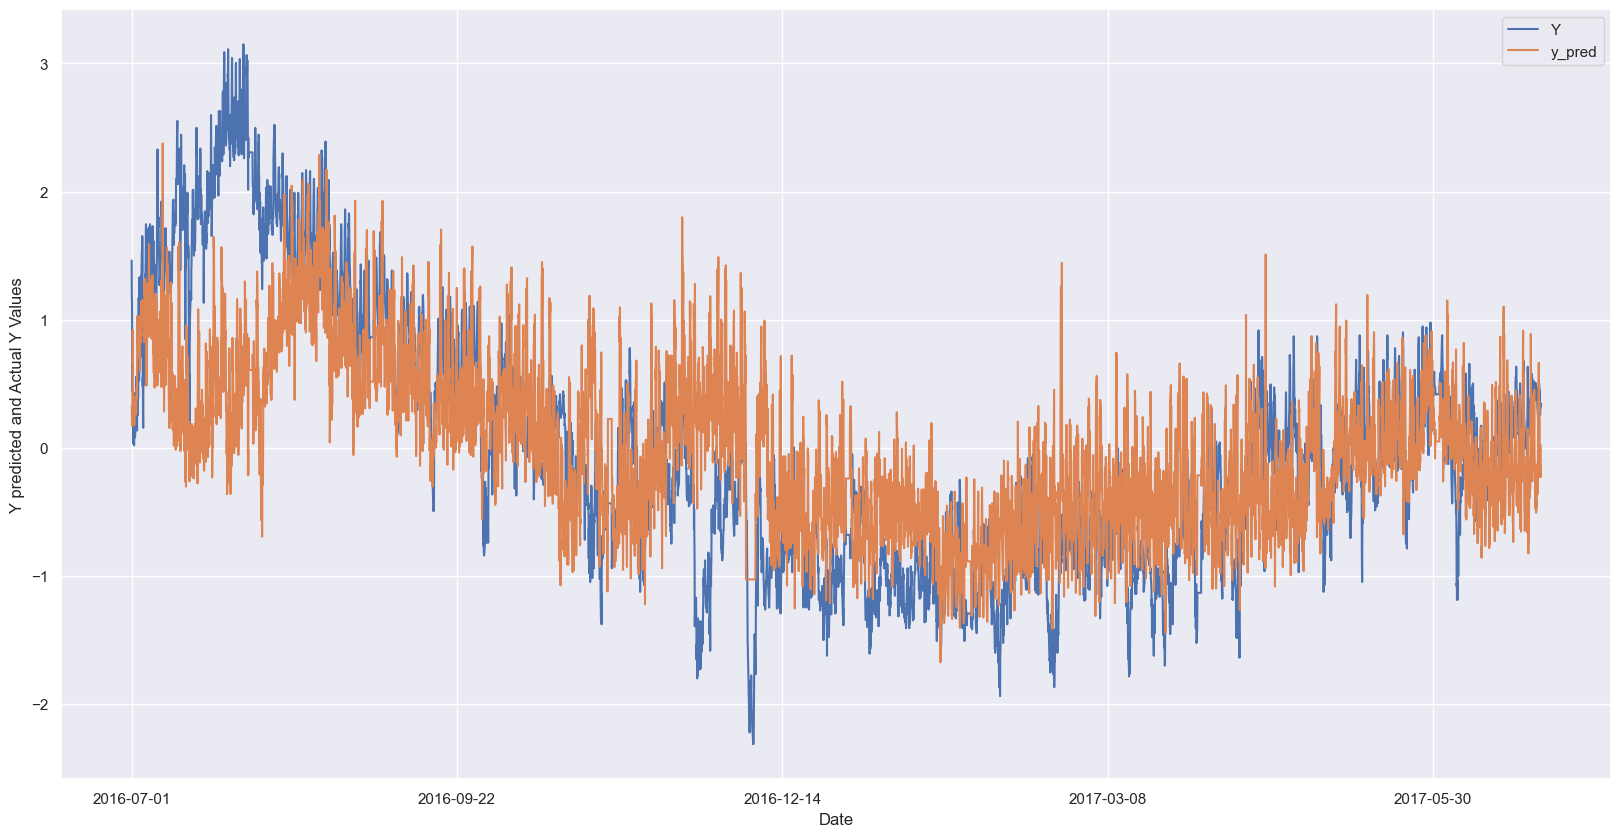

In [365]:
# fig, ax = plt.subplots() # Create the figure and axes object
normalized_train_df = normalized_train_df.reset_index()
normalized_train_df = normalized_train_df.reset_index()
# Plot the first x and y axes:
normalized_train_df.plot(x = 'date', y = ['Y','y_pred'], figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Y predicted and Actual Y Values") 

## For Validation Set

In [366]:
# obtain the feature matrix as a numpy array
X = normalized_validation_df[['X1','X2','X3','X4','X5','X6']]
# obtain the target variable as a numpy array
y = normalized_validation_df[['Y']]
m = y.shape
print(" The Shape of Y Matrix: ", m)
# Creating Vector of ones
const_col = np.ones((m))
# and adding it to the feature matrix
X = np.concatenate((const_col, X), 1)
# Calculating b for the equation Ax=b
b = X.transpose().dot(y)
print("\n The b vector is :\n", b , "\n The shape of this vector is :\n", b.shape)
# Calculating b for the equation Ax=b
A = X.transpose().dot(X)
print("\n The newly computed A Matrix is :\n", A , " \n The shape of the above matrix :\n", A.shape)
y_pred_validation = X.dot(betas)
mse = (1/len(y))*np.dot((y-y_pred_validation).T, (y-y_pred_validation))
print(" MSE for Validation set:\n",mse)

 The Shape of Y Matrix:  (2880, 1)

 The b vector is :
 [[-9.07718345e-13]
 [-1.12936380e+02]
 [ 3.88084138e+02]
 [-3.09059689e+02]
 [ 4.72762588e+02]
 [ 1.85645379e+03]
 [-1.63539849e+02]] 
 The shape of this vector is :
 (7, 1)

 The newly computed A Matrix is :
 [[ 2.88000000e+03 -5.68434189e-14 -9.94759830e-14 -1.20792265e-13
  -4.97379915e-13 -5.89750471e-13  4.05009359e-13]
 [-5.68434189e-14  2.87900000e+03 -3.92519083e+02  2.83199124e+03
  -6.22210058e+02  2.96525331e+02  1.03567461e+02]
 [-9.94759830e-14 -3.92519083e+02  2.87900000e+03 -5.33061367e+02
   2.63232807e+03  6.76817030e+02  1.13787128e+03]
 [-1.20792265e-13  2.83199124e+03 -5.33061367e+02  2.87900000e+03
  -6.77686407e+02  1.84205492e+02 -1.09334235e+02]
 [-4.97379915e-13 -6.22210058e+02  2.63232807e+03 -6.77686407e+02
   2.87900000e+03  5.55409885e+02  9.59083280e+01]
 [-5.89750471e-13  2.96525331e+02  6.76817030e+02  1.84205492e+02
   5.55409885e+02  2.87900000e+03  3.52314912e+02]
 [ 4.05009359e-13  1.03567461e+0

In [367]:
normalized_validation_df[['y_pred']] = y_pred_validation
# train_y_pred = y_pred[:'2017-06-26']
normalized_validation_df

,X1,X2,X3,X4,X5,X6,Y,y_pred
date,,,,,,,,
2017-06-27,0.739005,0.694476,0.754053,1.236336,-0.439934,-1.504280,0.843571,0.249098
2017-06-27,0.931172,1.205312,0.983595,1.749566,-0.478505,-1.622522,0.900172,0.502410
2017-06-27,0.876267,0.994968,0.929852,1.625992,-0.497475,-1.544123,0.857821,0.423996
2017-06-27,0.812211,1.115165,0.983595,1.891576,-0.690334,-1.622522,0.674169,0.487816
2017-06-27,0.775608,0.994968,0.846832,1.714188,-0.478505,-1.387323,0.603518,0.476774
...,...,...,...,...,...,...,...,...
2017-10-24,0.245135,-0.176502,0.109275,-0.268971,0.099438,0.491703,-0.822546,-0.031088
2017-10-24,0.217683,-0.116404,0.163018,-0.268971,0.003325,0.805302,-0.935548,0.012210
2017-10-24,0.052969,-0.056305,0.192295,-0.162339,-0.478505,0.726902,-0.935548,-0.039462


Text(0, 0.5, 'Y predicted and Actual Y Values')

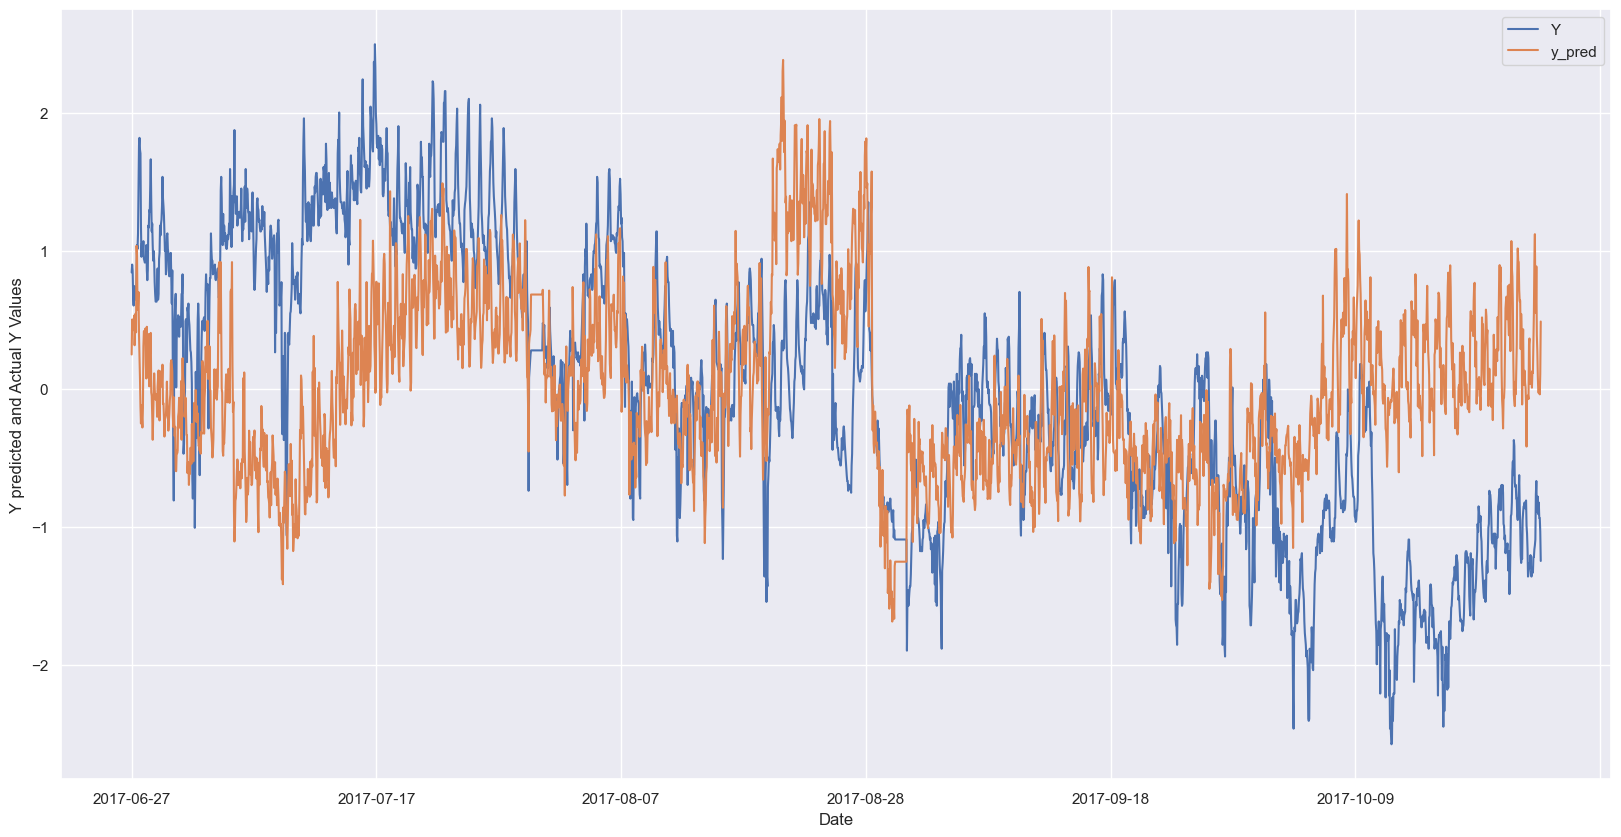

In [368]:
# fig, ax = plt.subplots() # Create the figure and axes object
normalized_validation_df = normalized_validation_df.reset_index()
normalized_validation_df = normalized_validation_df.reset_index()
# Plot the first x and y axes:
normalized_validation_df.plot(x = 'date', y = ['Y','y_pred'], figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Y predicted and Actual Y Values") 

## For Test Set

In [369]:
# obtain the feature matrix as a numpy array
X = normalized_test_df[['X1','X2','X3','X4','X5','X6']]
# obtain the target variable as a numpy array
y = normalized_test_df[['Y']]
m = y.shape
print(" The Shape of Y Matrix: ", m)
# Creating Vector of ones
const_col = np.ones((m))
# and adding it to the feature matrix
X = np.concatenate((const_col, X), 1)
# Calculating b for the equation Ax=b
b = X.transpose().dot(y)
print("\n The b vector is :\n", b , "\n The shape of this vector is :\n", b.shape)
# Calculating b for the equation Ax=b
A = X.transpose().dot(X)
print("\n The newly computed A Matrix is :\n", A , " \n The shape of the above matrix :\n", A.shape)
y_pred_test = X.dot(betas)
mse = (1/len(y))*np.dot((y-y_pred_test).T, (y-y_pred_test))
print(" MSE for Test set:\n",mse)

 The Shape of Y Matrix:  (2880, 1)

 The b vector is :
 [[ 4.89386309e-13]
 [-9.45754966e+02]
 [ 5.84182636e+00]
 [-8.35502189e+02]
 [-1.09431733e+02]
 [-1.11901762e+03]
 [ 1.16236349e+03]] 
 The shape of this vector is :
 (7, 1)

 The newly computed A Matrix is :
 [[ 2.88000000e+03 -7.81597009e-14  3.83693077e-13 -1.35003120e-13
   3.83693077e-13 -9.27258270e-13  5.11590770e-13]
 [-7.81597009e-14  2.87900000e+03  1.83449502e+02  2.85748930e+03
   1.82312866e+02  9.77051675e+02 -7.34955933e+02]
 [ 3.83693077e-13  1.83449502e+02  2.87900000e+03  1.64975203e+02
   2.70278841e+03  1.42757662e+02  9.20743500e+02]
 [-1.35003120e-13  2.85748930e+03  1.64975203e+02  2.87900000e+03
   2.04983501e+02  6.59433352e+02 -8.08023717e+02]
 [ 3.83693077e-13  1.82312866e+02  2.70278841e+03  2.04983501e+02
   2.87900000e+03 -1.66216819e+02  4.48361488e+02]
 [-9.27258270e-13  9.77051675e+02  1.42757662e+02  6.59433352e+02
  -1.66216819e+02  2.87900000e+03  4.04610948e+02]
 [ 5.11590770e-13 -7.34955933e+0

In [370]:
normalized_test_df[['y_pred']] = y_pred_test
# train_y_pred = y_pred[:'2017-06-26']
normalized_test_df

,X1,X2,X3,X4,X5,X6,Y,y_pred
date,,,,,,,,
2017-10-25,0.278553,-0.064483,0.510387,0.815098,-1.304893,0.133449,1.397291,0.029200
2017-10-25,0.489880,1.134056,0.592424,0.604572,-0.938679,0.436160,1.148831,0.346503
2017-10-25,0.472258,0.807181,0.611678,0.604572,-1.272098,0.133449,1.216564,0.167954
2017-10-25,0.481069,1.515409,0.674325,0.710329,-1.205414,0.633579,1.058628,0.447459
2017-10-25,0.507501,0.916140,0.655070,1.025625,-1.472149,1.035000,0.945634,0.420776
...,...,...,...,...,...,...,...,...
2018-02-21,1.009582,-0.554795,0.818873,-0.624984,1.857664,-1.268232,-0.296343,-0.158589
2018-02-21,1.124122,-0.336879,0.910402,-0.484633,2.057716,-1.169522,-0.183349,-0.013785
2018-02-21,1.194608,-0.118963,0.973048,-0.343293,2.124399,-1.169522,0.177784,0.092194


Text(0, 0.5, 'Y predicted and Actual Y Values')

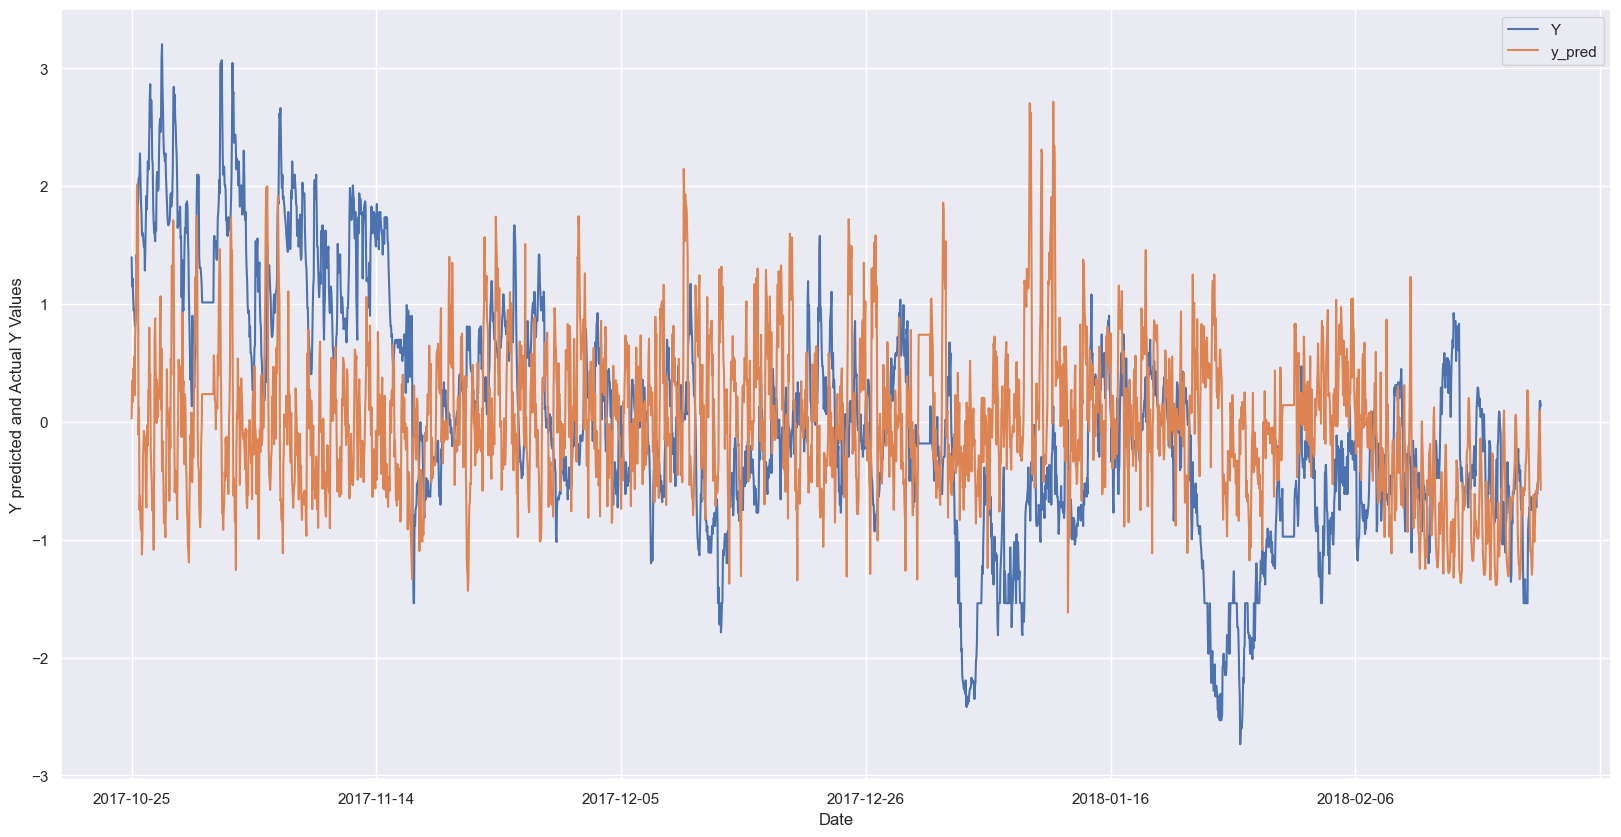

In [371]:
import matplotlib.pyplot as plt # Impot the relevant module

# fig, ax = plt.subplots() # Create the figure and axes object
normalized_test_df = normalized_test_df.reset_index()
# Plot the first x and y axes:
normalized_test_df.plot(x = 'date', y = ['Y','y_pred'], figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Y predicted and Actual Y Values") 